# Chapter 5. 데이터 분석 - 공개 데이터 분석 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 1. Korea COVID-19 Data
* https://dacon.io/en/competitions/official/235590/data

In [4]:
df_case = pd.read_csv('./Data/Case.csv')
df_time = pd.read_csv('./Data/Time.csv')
df_time_age = pd.read_csv('./Data/TimeAge.csv')
df_time_pro = pd.read_csv('./Data/TimeProvince.csv')
df_time_gen = pd.read_csv('./Data/TimeGender.csv')

## 1). Case Data

In [5]:
df_case.head(3)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387


### 열 이름 변경

In [6]:
df_case.columns = ['사례번호','시도','군구','집단감염여부','집단감염장소','누적확진자수','위도','경도']
df_case.head(3)

,사례번호,시도,군구,집단감염여부,집단감염장소,누적확진자수,위도,경도
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387


### 데이터 정보

In [7]:
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사례번호    174 non-null    int64 
 1   시도      174 non-null    object
 2   군구      174 non-null    object
 3   집단감염여부  174 non-null    bool  
 4   집단감염장소  174 non-null    object
 5   누적확진자수  174 non-null    int64 
 6   위도      174 non-null    object
 7   경도      174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


### 중복 확인

In [8]:
df_case.duplicated().sum()

0

### 데이터 시각화

#### 1. 집단 감염 장소

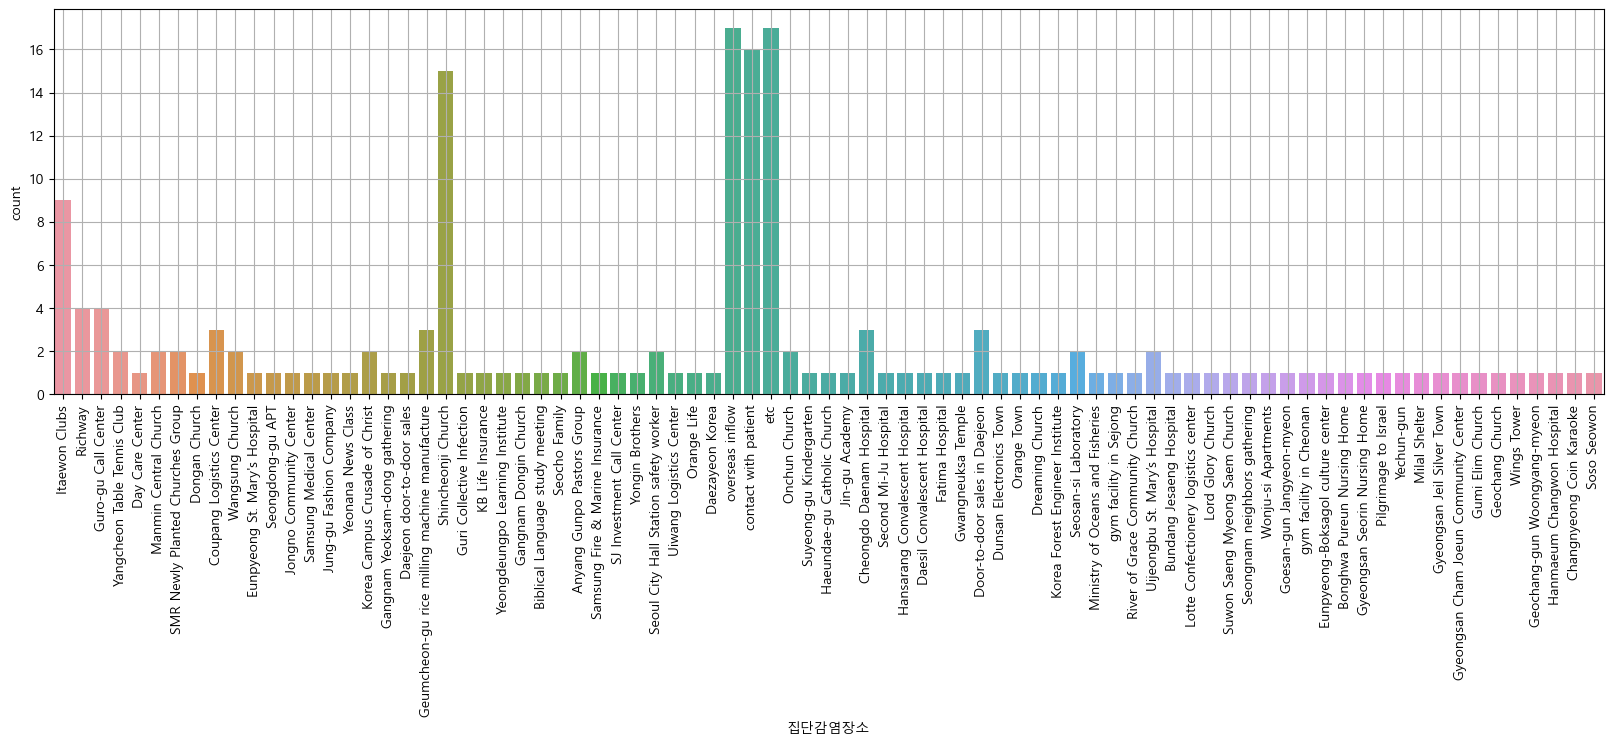

In [9]:
plt.figure(figsize = (20,5))

sns.countplot(x = '집단감염장소', data = df_case)

plt.xticks(rotation = 90)
plt.grid()

plt.show()

#### 2. 장소별 확진자 수

In [10]:
nocp = df_case.groupby('집단감염장소', as_index = False).agg('sum')[['집단감염장소','누적확진자수']].set_index('집단감염장소')
nocp.head(3)

,누적확진자수
집단감염장소,
Anyang Gunpo Pastors Group,23
Biblical Language study meeting,3
Bonghwa Pureun Nursing Home,68


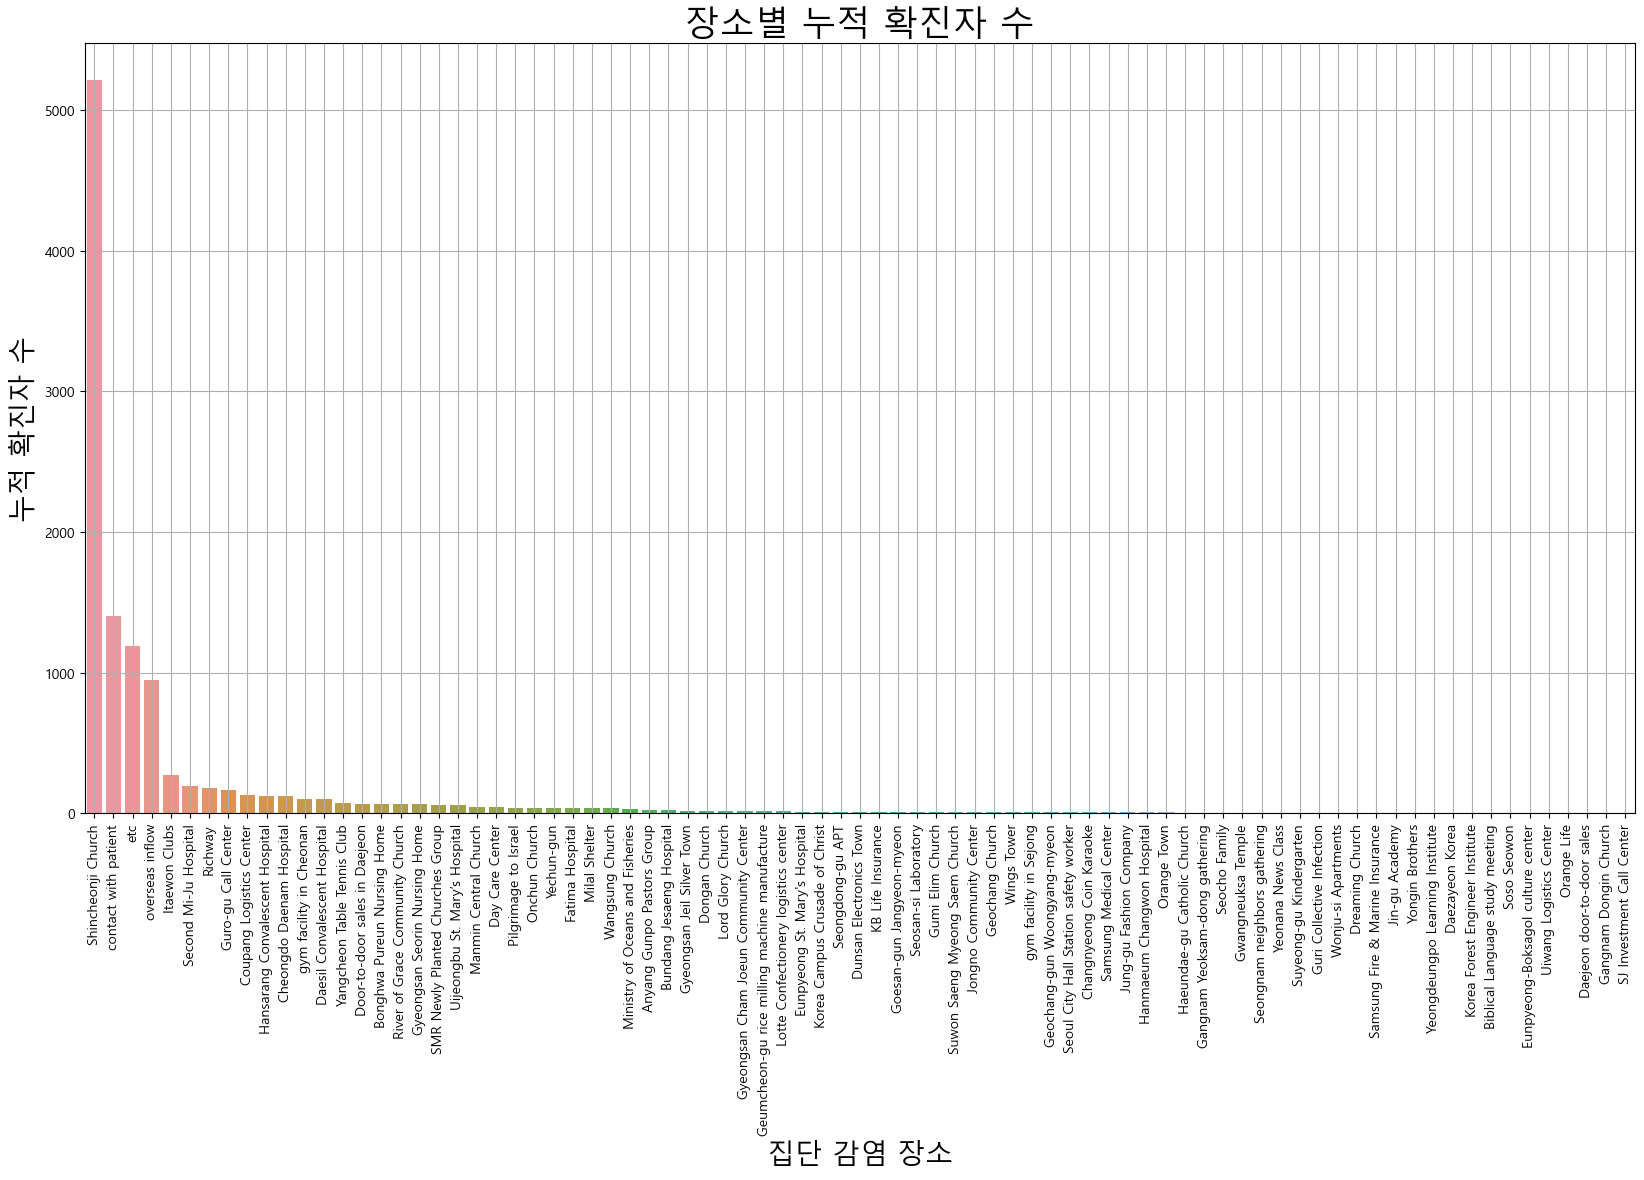

In [11]:
nocp = nocp.sort_values(by = '누적확진자수', ascending = False)

plt.figure(figsize = (20,10))

sns.set_palette('Set1')
sns.barplot(x = nocp.index, y = '누적확진자수', data = nocp)

plt.title('장소별 누적 확진자 수', fontsize = 25)
plt.xlabel('집단 감염 장소', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('누적 확진자 수', fontsize = 20)
plt.grid()

plt.show()

## 2). Time Data

In [12]:
df_time.head(3)

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0


In [13]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


### 열 이름 변경

In [14]:
df_time.columns = ['날짜','시간','누적검사자수','음성누적수','양성누적수','누적완치자수','누적사망자수']
df_time.head(3)

,날짜,시간,누적검사자수,음성누적수,양성누적수,누적완치자수,누적사망자수
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0


### 결측치 확인

In [15]:
df_time.isna().sum()

날짜        0
시간        0
누적검사자수    0
음성누적수     0
양성누적수     0
누적완치자수    0
누적사망자수    0
dtype: int64

### 데이터 시각화

#### x축 눈금 간격 조정

In [16]:
start_date = pd.to_datetime('2020-01-20')
end_date = pd.to_datetime('2020-06-30')

dates = pd.date_range(start_date, end_date, freq = 'D')
x_values = np.arange(len(dates))

#### 1. 누적 검사자 수

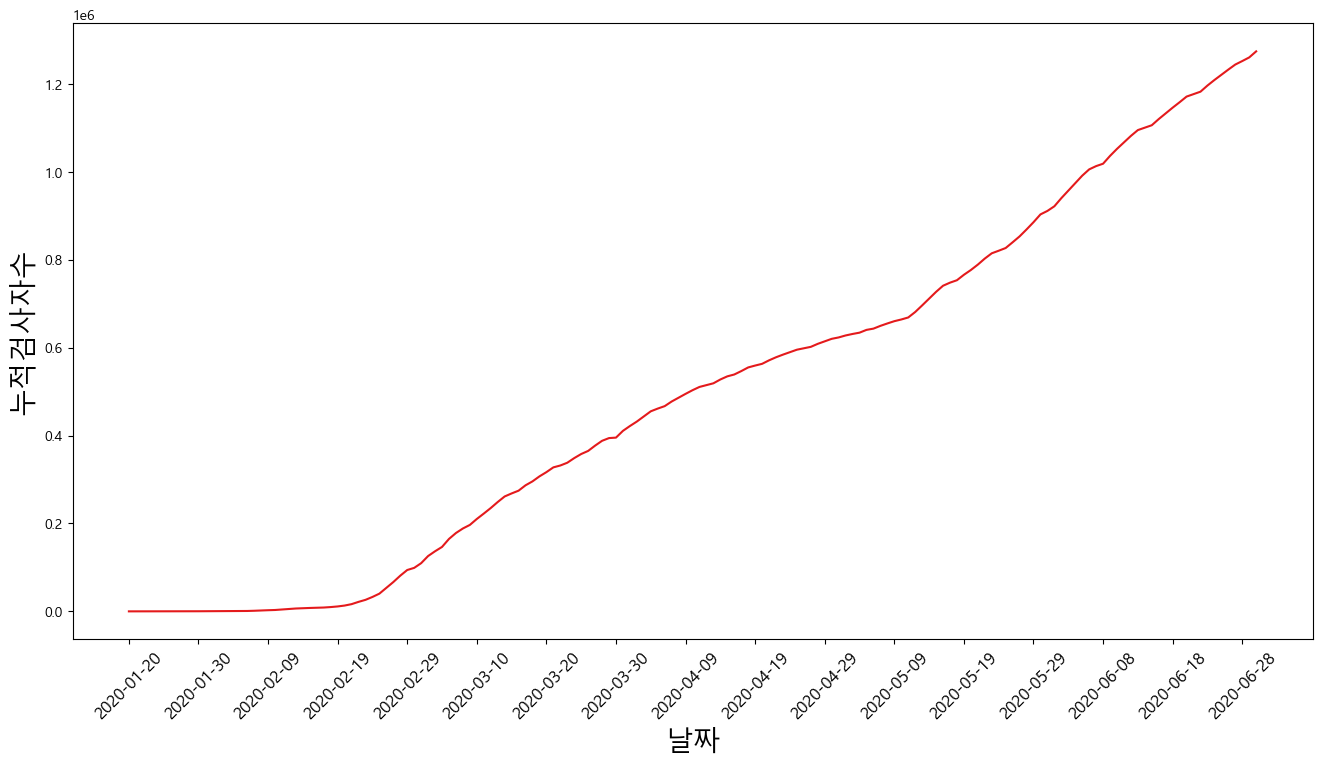

In [17]:
plt.figure(figsize = (16,8))

ax = sns.lineplot(x = x_values, y = '누적검사자수', data = df_time)
ax.set_xticks(x_values[::10])
ax.set_xticklabels(dates[::10].strftime('%Y-%m-%d'), rotation = 45, fontsize = 12)

plt.xlabel('날짜', fontsize = 20)
plt.ylabel('누적검사자수', fontsize = 20)

plt.show()

#### 2. 누적 양성 수

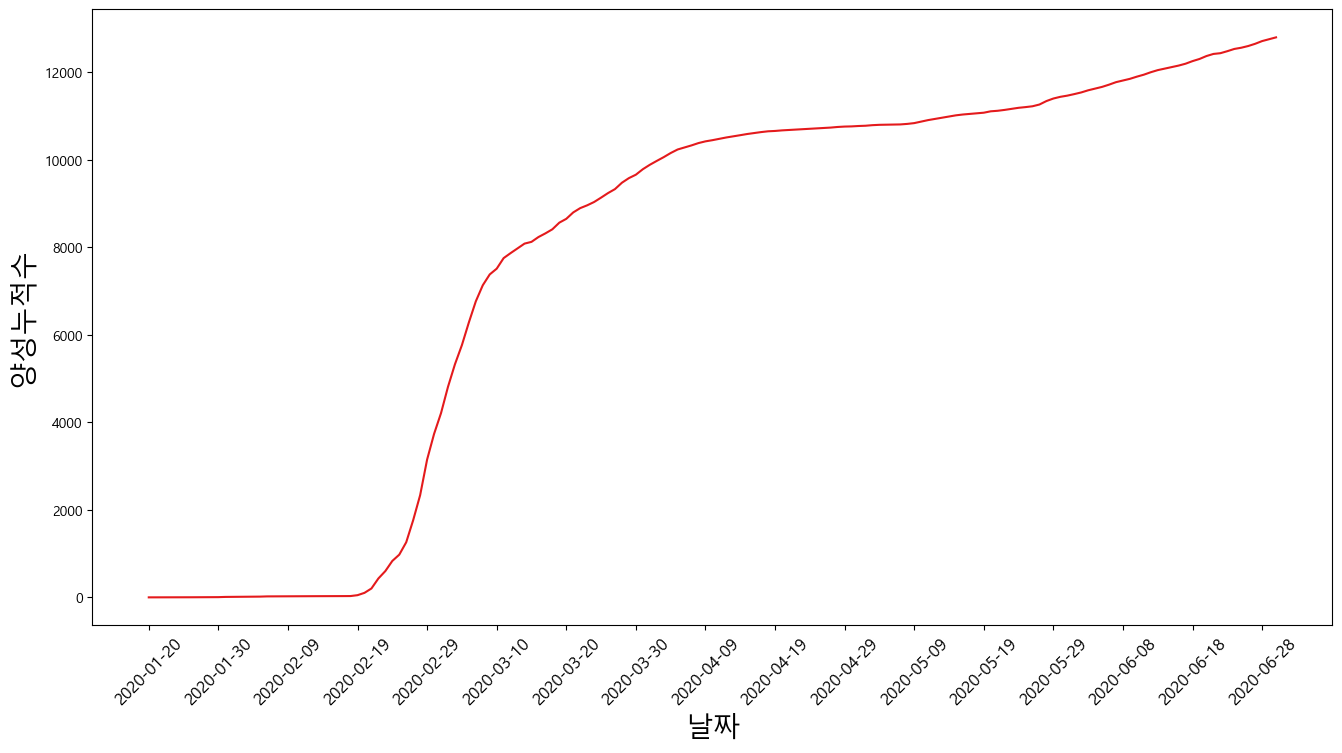

In [18]:
plt.figure(figsize = (16,8))

ax = sns.lineplot(x = x_values, y = '양성누적수', data = df_time)
ax.set_xticks(x_values[::10])
ax.set_xticklabels(dates[::10].strftime('%Y-%m-%d'), rotation = 45, fontsize = 12)

plt.xlabel('날짜', fontsize = 20)
plt.ylabel('양성누적수', fontsize = 20)

plt.show()

#### 3. 누적 사망자 수

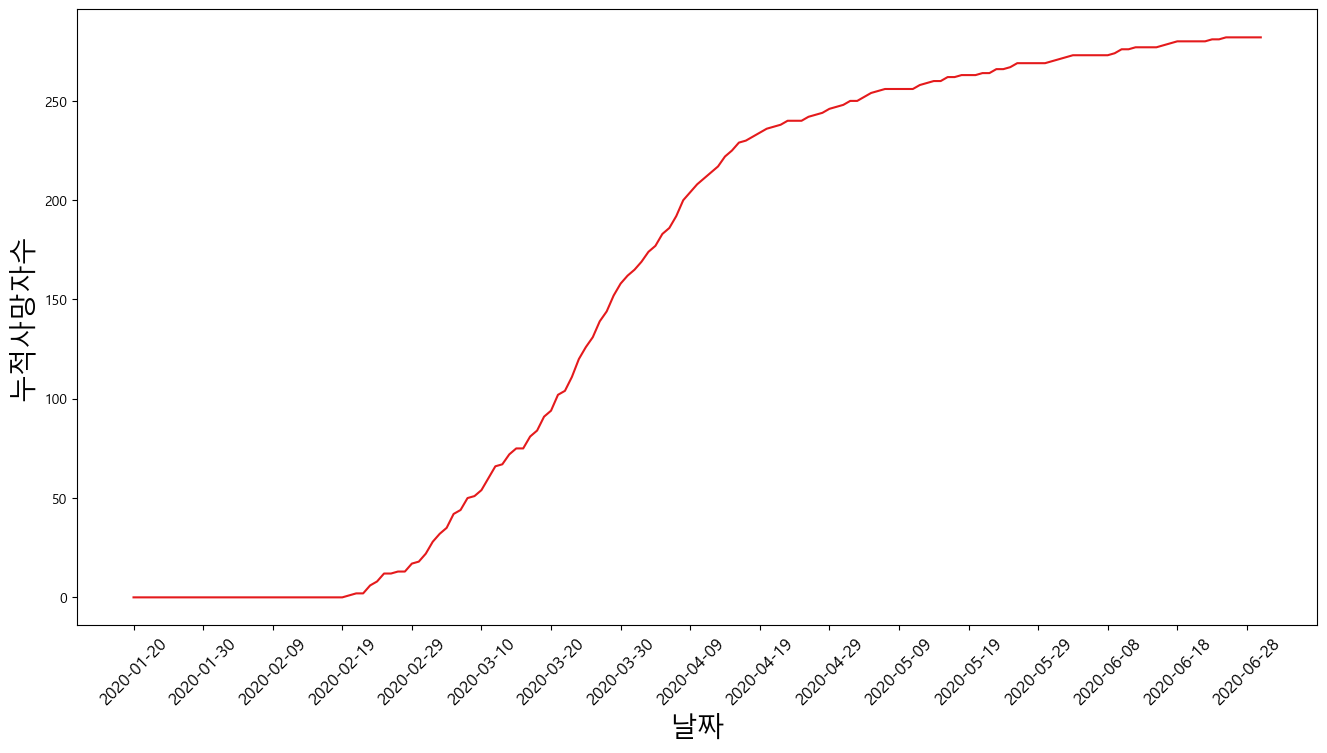

In [19]:
plt.figure(figsize = (16,8))

ax = sns.lineplot(x = x_values, y = '누적사망자수', data = df_time)
ax.set_xticks(x_values[::10])
ax.set_xticklabels(dates[::10].strftime('%Y-%m-%d'), rotation = 45, fontsize = 12)

plt.xlabel('날짜', fontsize = 20)
plt.ylabel('누적사망자수', fontsize = 20)

plt.show()

## 3). TimeAge Data

In [20]:
df_time_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1089 non-null   object
 1   time       1089 non-null   int64 
 2   age        1089 non-null   object
 3   confirmed  1089 non-null   int64 
 4   deceased   1089 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.7+ KB


### 결측치 확인

In [21]:
df_time_age.isna().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

### 열 정리

#### 열 삭제

In [22]:
df_time_age.drop('time',  axis = 1, inplace = True)
df_time_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1089 non-null   object
 1   age        1089 non-null   object
 2   confirmed  1089 non-null   int64 
 3   deceased   1089 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 34.2+ KB


#### 열 이름 변경

In [23]:
df_time_age.columns = ['날짜','나이대','누적확진자수','누적사망자수']
df_time_age.head(3)

,날짜,나이대,누적확진자수,누적사망자수
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0


#### 날짜 Datatype

In [24]:
df_time_age['날짜'] = pd.to_datetime(df_time_age['날짜'])
df_time_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      1089 non-null   datetime64[ns]
 1   나이대     1089 non-null   object        
 2   누적확진자수  1089 non-null   int64         
 3   누적사망자수  1089 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 34.2+ KB


#### 파생변수

In [25]:
df_time_age['월'] = df_time_age['날짜'].dt.to_period('M')
df_time_age.head(3)

,날짜,나이대,누적확진자수,누적사망자수,월
0,2020-03-02,0s,32,0,2020-03
1,2020-03-02,10s,169,0,2020-03
2,2020-03-02,20s,1235,0,2020-03


#### Groupby

In [26]:
gb_time_age = df_time_age.groupby(['월','나이대'], as_index = False).sum()
gb_time_age.head(3)

,월,나이대,누적확진자수,누적사망자수
0,2020-03,0s,2435,0
1,2020-03,10s,12248,0
2,2020-03,20s,67073,0


### 데이터 시각화

#### 나이대별, 월별 누적 확진자 수

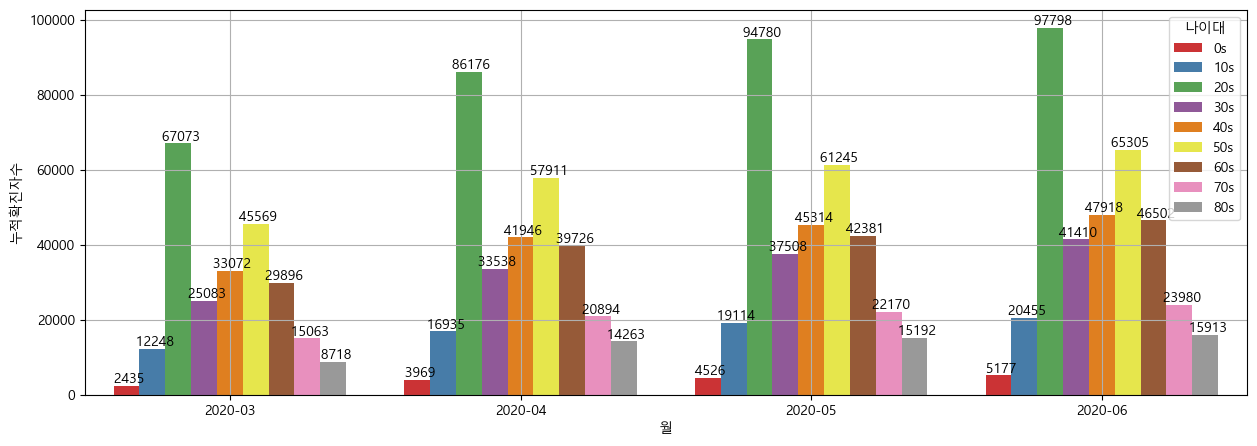

In [27]:
plt.figure(figsize = (15,5))

ax = plt.gca()

sns.set_palette('Set1')
sns.barplot(x = '월', y = '누적확진자수', hue = '나이대', data = gb_time_age)

for p in ax.patches :
    ax.annotate(f'{p.get_height() : .0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center',
                va = 'bottom')
    
plt.grid()
plt.show()

## 4). TimeProvince Data

In [28]:
df_time_pro.head(3)

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0


In [29]:
df_time_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2771 non-null   object
 1   time       2771 non-null   int64 
 2   province   2771 non-null   object
 3   confirmed  2771 non-null   int64 
 4   released   2771 non-null   int64 
 5   deceased   2771 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 130.0+ KB


### 열 이름 정리

In [30]:
df_time_pro.columns = ['날짜','시간','시도','누적확진자수','누적완치자수','누적사망자수']
df_time_pro.drop('시간', axis = 1, inplace = True)
df_time_pro.head(3)

,날짜,시도,누적확진자수,누적완치자수,누적사망자수
0,2020-01-20,Seoul,0,0,0
1,2020-01-20,Busan,0,0,0
2,2020-01-20,Daegu,0,0,0


### 결측치 확인

In [31]:
df_time_pro.isna().sum()

날짜        0
시도        0
누적확진자수    0
누적완치자수    0
누적사망자수    0
dtype: int64

### 데이터 시각화

#### 시도별 누적 확진자 수 추이

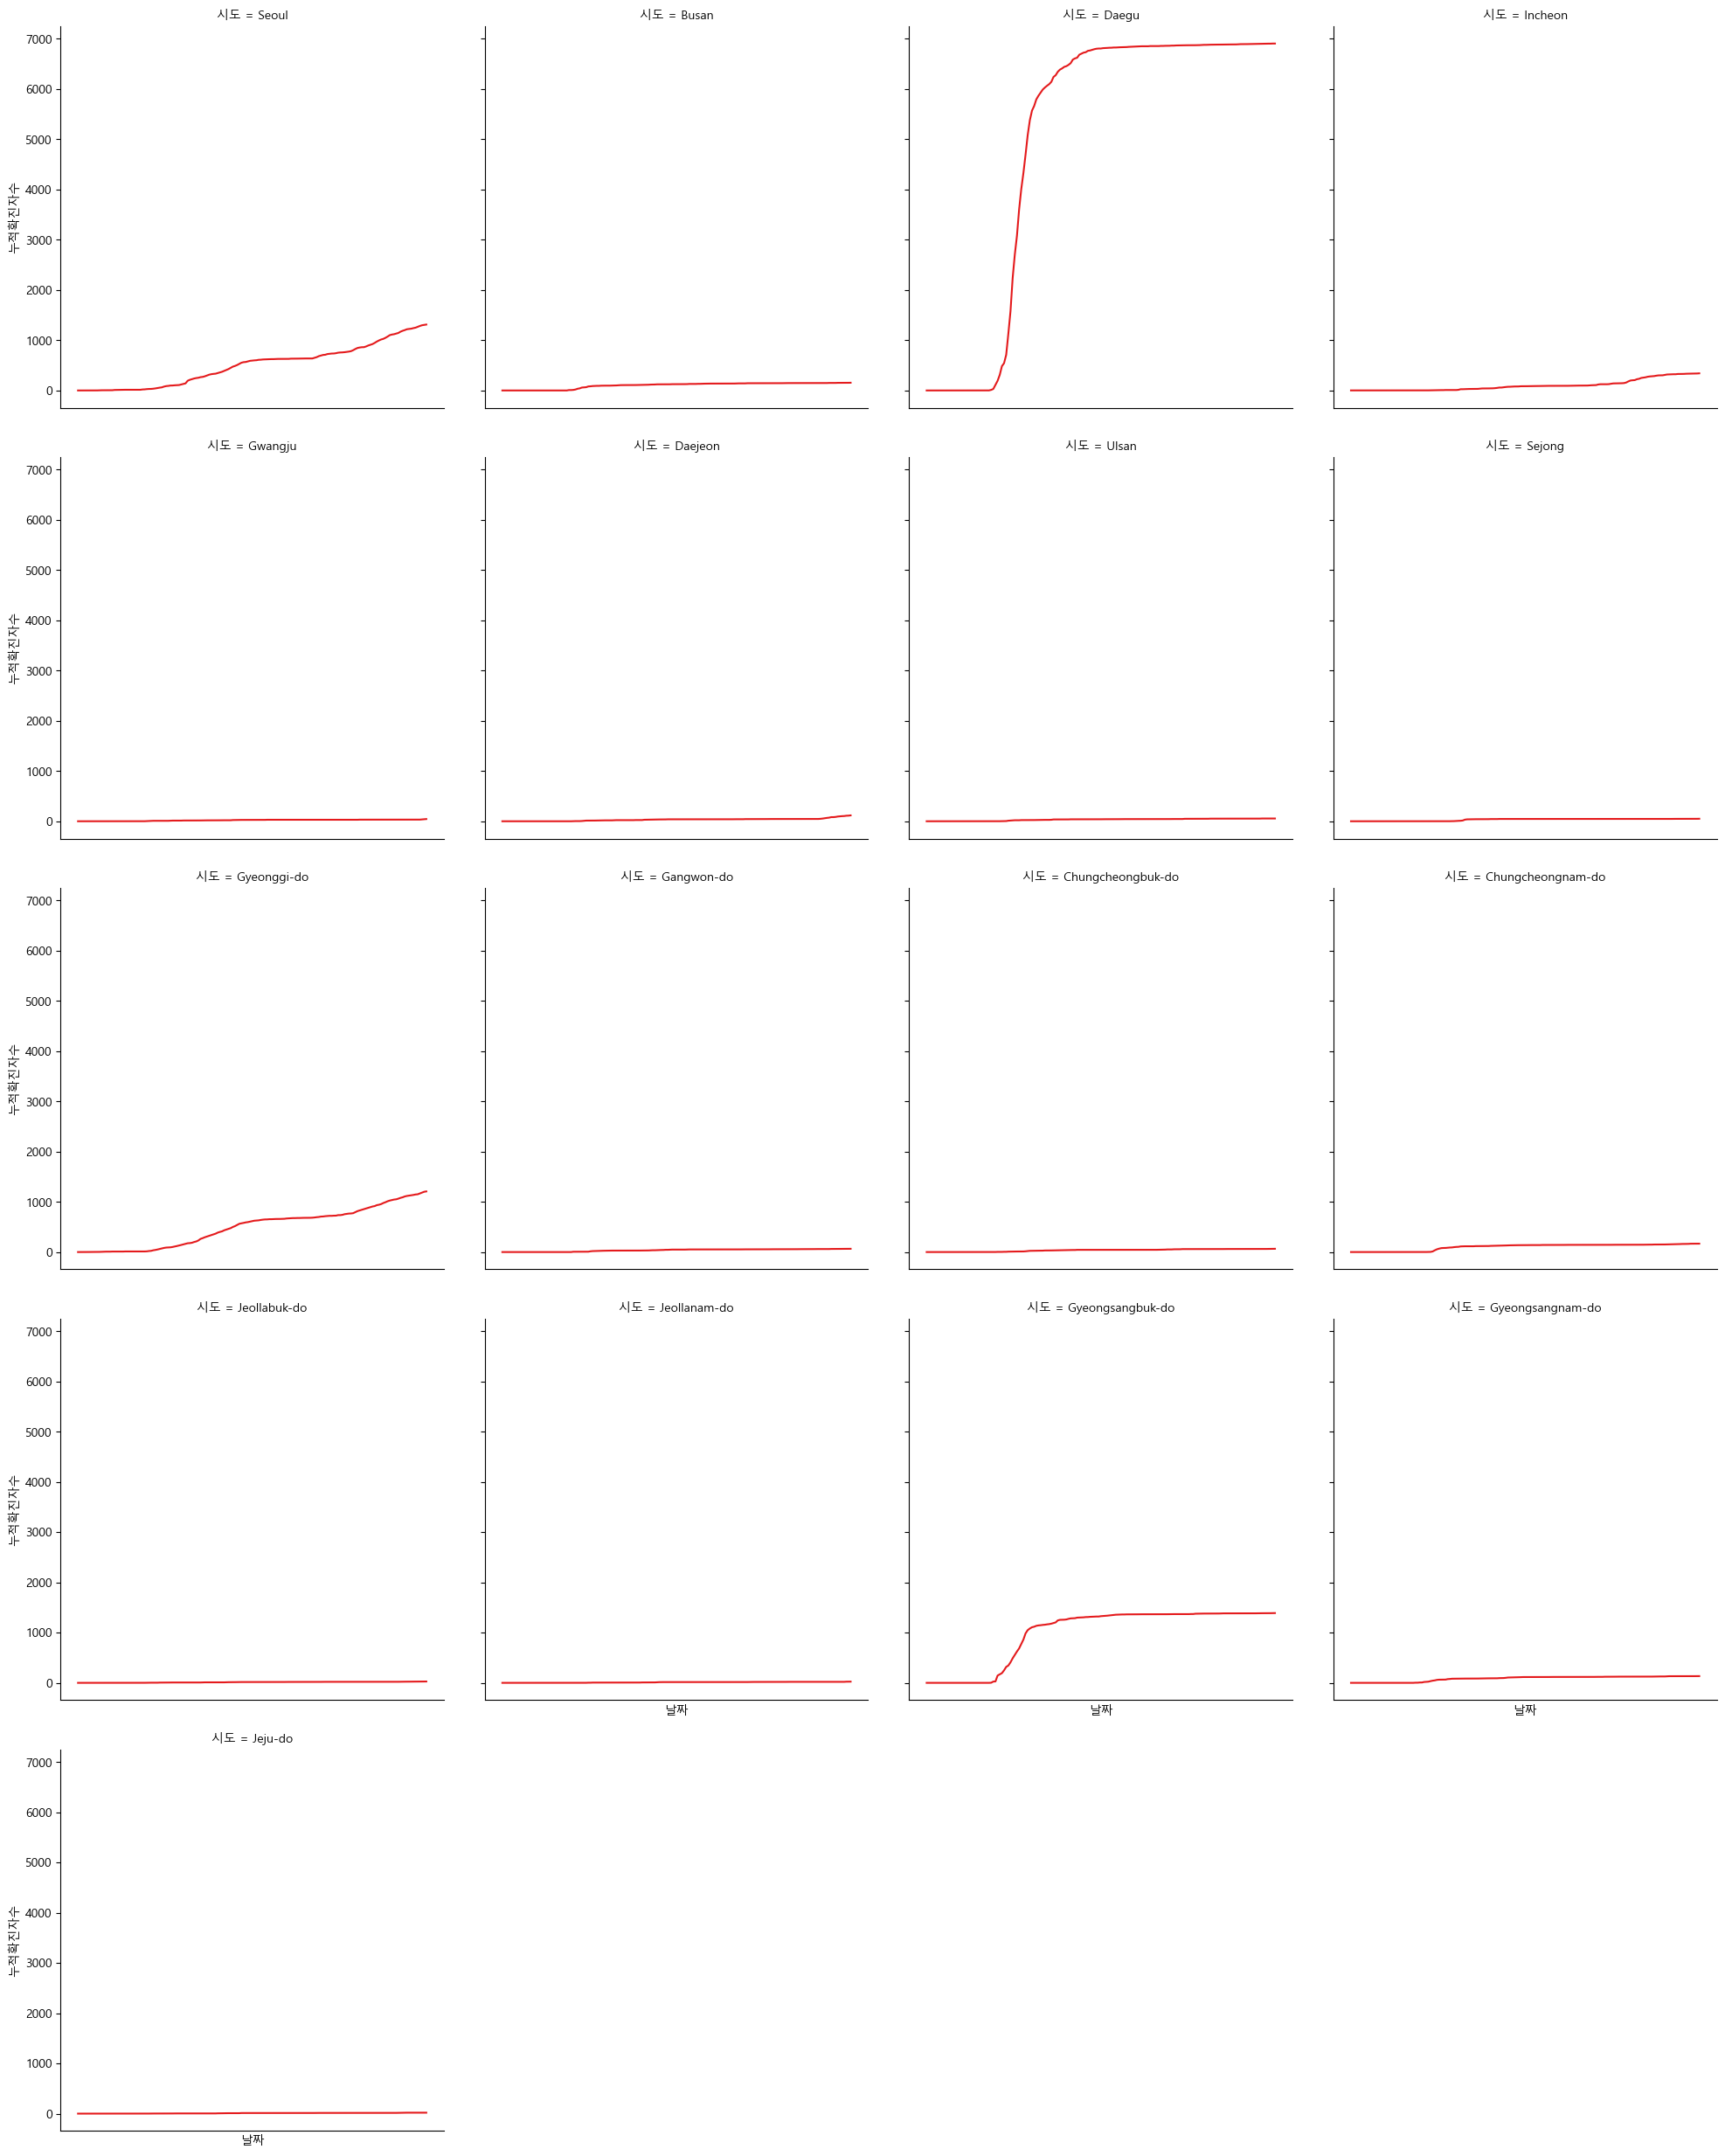

In [32]:
sns.relplot(x = '날짜', y = '누적확진자수', data = df_time_pro,
            kind = 'line', col = '시도', col_wrap = 4, sizes = (16,6))

plt.xticks([])
plt.show()

## 5). TimeGender Data

In [33]:
df_time_gen.head(3)

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16


In [34]:
df_time_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       242 non-null    object
 1   time       242 non-null    int64 
 2   sex        242 non-null    object
 3   confirmed  242 non-null    int64 
 4   deceased   242 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 9.6+ KB


### 열 정리

#### 열 이름 변경

In [35]:
df_time_gen.columns = ['날짜','시간','성별','누적확진자수','누적사망자수']
df_time_gen.head(3)

,날짜,시간,성별,누적확진자수,누적사망자수
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16


#### 날짜 Datatype

In [36]:
df_time_gen['날짜'] = pd.to_datetime(df_time_gen['날짜'])
df_time_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      242 non-null    datetime64[ns]
 1   시간      242 non-null    int64         
 2   성별      242 non-null    object        
 3   누적확진자수  242 non-null    int64         
 4   누적사망자수  242 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.6+ KB


### 결측치 확인

In [37]:
df_time_gen.isna().sum()

날짜        0
시간        0
성별        0
누적확진자수    0
누적사망자수    0
dtype: int64

### 데이터 시각화

#### 성별에 따른 누적 확진자 수 추이

Text(0, 0.5, '누적 확진자 수')

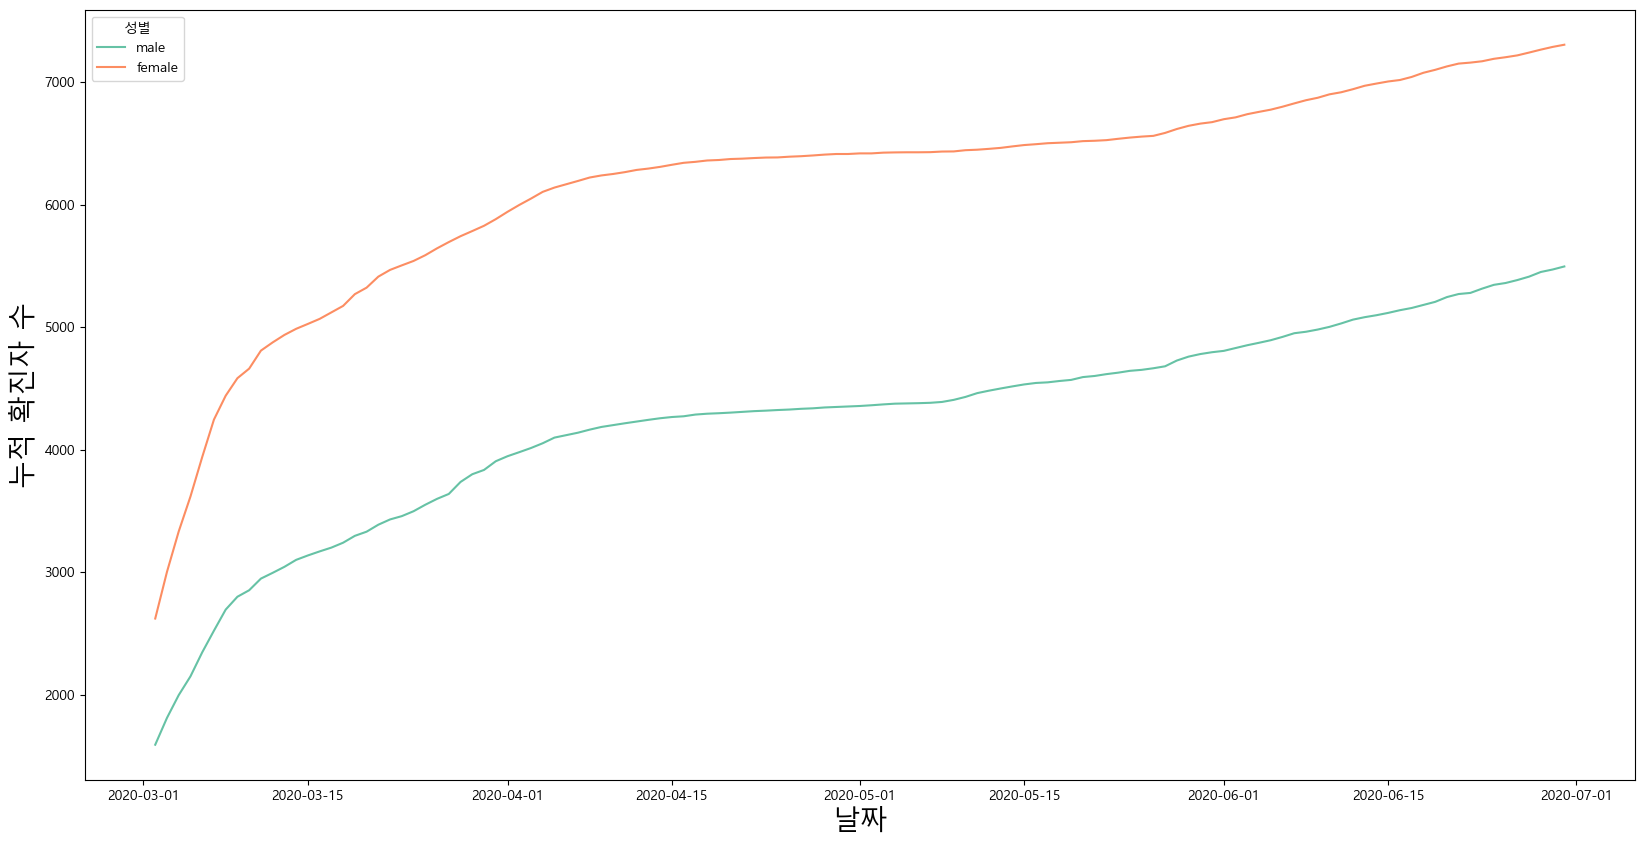

In [38]:
plt.figure(figsize = (20,10))

sns.set_palette('Set2')
sns.lineplot(x = '날짜', y = '누적확진자수', hue = '성별', data = df_time_gen)

plt.xlabel('날짜', fontsize = 20)
plt.ylabel('누적 확진자 수', fontsize = 20)

# 2. USDA Food Data

In [39]:
import json

In [40]:
data = json.load(open('./Data/usda_food.json'))

## 데이터 확인

In [41]:
data[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

### 첫 번째 음식의 영양소에 대한 데이터 프레임 확인

In [42]:
pd.DataFrame(data[0]['nutrients']).head(3)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition


### 각 음식에 대한 데이터 프레임 확인

In [43]:
pd.DataFrame(data).head(3)

,id,description,tags,manufacturer,group,portions,nutrients
0,1008,"Cheese, caraway",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 4.22, 'units': 'g', 'description': ..."


* 데이터 안에 또 데이터가 존재

## 데이터 시각화
영양소 중 하나를 골라서 각 그룹별로 중앙값을 계산하여 막대 그래프를 작성하세요.

### 데이터 병합 방법 1

#### 영양소 데이터

In [44]:
pd.DataFrame(pd.DataFrame(data)['nutrients'][0])

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [45]:
dfs = []

for f in data :
    df = pd.DataFrame(f['nutrients'])
    df['id'] = f['id']
    dfs.append(df)
    
df_nutr = pd.concat(dfs)[['id','description','value']]
df_nutr

,id,description,value
0,1008,Protein,25.180
1,1008,Total lipid (fat),29.200
2,1008,"Carbohydrate, by difference",3.060
3,1008,Ash,3.280
4,1008,Energy,376.000
...,...,...,...
45,43546,"Vitamin B-12, added",0.000
46,43546,Cholesterol,0.000
47,43546,"Fatty acids, total saturated",0.072
48,43546,"Fatty acids, total monounsaturated",0.028


#### 음식 데이터

In [46]:
df_food = pd.DataFrame(data, columns = ['id','group'])
df_food

,id,group
0,1008,Dairy and Egg Products
1,1009,Dairy and Egg Products
2,1018,Dairy and Egg Products
3,1019,Dairy and Egg Products
4,1028,Dairy and Egg Products
...,...,...
6631,42161,Sausages and Luncheon Meats
6632,42173,Sausages and Luncheon Meats
6633,43408,Baby Foods
6634,43539,Baby Foods


#### 데이터 병합

In [47]:
df = pd.merge(df_nutr, df_food, on = 'id', how = 'outer')[['id','group','description','value']]
df

,id,group,description,value
0,1008,Dairy and Egg Products,Protein,25.180
1,1008,Dairy and Egg Products,Total lipid (fat),29.200
2,1008,Dairy and Egg Products,"Carbohydrate, by difference",3.060
3,1008,Dairy and Egg Products,Ash,3.280
4,1008,Dairy and Egg Products,Energy,376.000
...,...,...,...,...
389350,43546,Baby Foods,"Vitamin B-12, added",0.000
389351,43546,Baby Foods,Cholesterol,0.000
389352,43546,Baby Foods,"Fatty acids, total saturated",0.072
389353,43546,Baby Foods,"Fatty acids, total monounsaturated",0.028


In [48]:
df['description'].unique()[0]

'Protein'

### 데이터 병합 방법 2
* 대용량 데이터의 경우 List Comprehension 활용

#### 영양소 데이터

In [49]:
df_nutr = pd.concat([pd.concat([pd.DataFrame(f['nutrients']),pd.Series([f['id'] for _ in f['nutrients']])], axis = 1) for f in data])
df_nutr.columns = ['value','units','description','group','id']
df_nutr = df_nutr[['id','description','value']]
df_nutr.head(3)

,id,description,value
0,1008,Protein,25.18
1,1008,Total lipid (fat),29.20
2,1008,"Carbohydrate, by difference",3.06


#### 음식 데이터

In [50]:
df_food = pd.DataFrame(data, columns = ['id','group'])
df_food.head(3)

,id,group
0,1008,Dairy and Egg Products
1,1009,Dairy and Egg Products
2,1018,Dairy and Egg Products


#### 데이터 병합

In [51]:
df = pd.merge(df_nutr, df_food, on = 'id', how = 'outer')[['id','group','description','value']]
df.head(3)

,id,group,description,value
0,1008,Dairy and Egg Products,Protein,25.18
1,1008,Dairy and Egg Products,Total lipid (fat),29.20
2,1008,Dairy and Egg Products,"Carbohydrate, by difference",3.06


### 시각화 방법 1

<Axes: ylabel='group'>

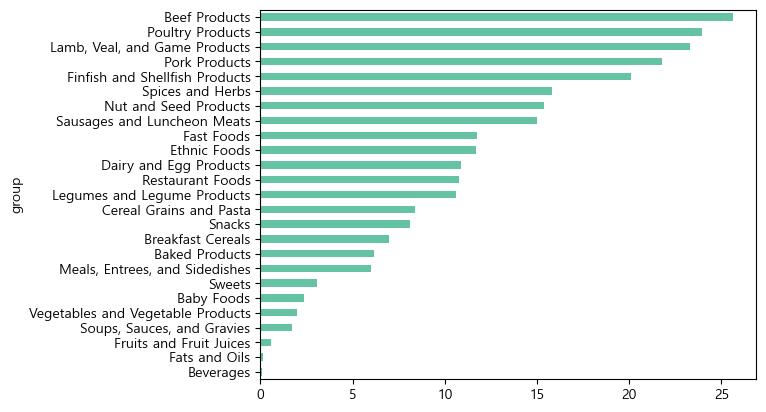

In [52]:
df.groupby(['description','group'])['value'].median()['Protein'].sort_values().plot(kind = 'barh')

### 시각화 방법 2

<Axes: ylabel='group'>

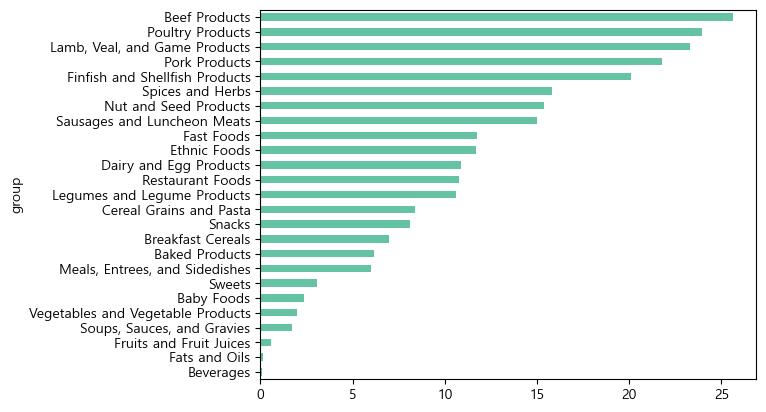

In [53]:
df.pivot_table('value', index = 'group', columns = 'description', aggfunc = 'median')['Protein'].sort_values().plot(kind = 'barh')

### 시각화 방법 3

<Axes: ylabel='group'>

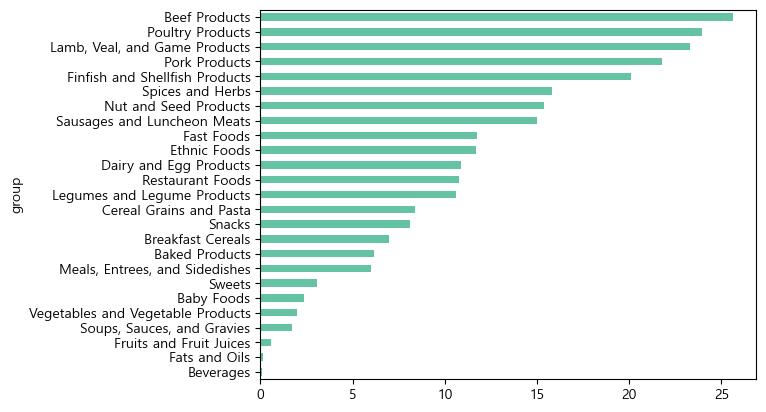

In [54]:
df[df['description'] == 'Protein'].groupby('group')['value'].median().sort_values().plot(kind = 'barh')

# 3. US President Candidate Data

In [55]:
data = pd.read_csv('./Data/fec.csv')
data.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073


## 유력 후보 추출

In [56]:
df = data[(data['cand_nm'] == 'Obama, Barack') | (data['cand_nm'] == 'Romney, Mitt')]
df.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,91280020.0,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689


## 데이터 시각화
직업별 기부금 총합의 top20을 막대그래프로 표현하세요.  
단, 각 후보자별로 시각화 할 것.
* 직업 : contbr_occupation
* 기부금 : contb_receipt_amt

## My Answer

In [57]:
df.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [58]:
df2 = df[['cand_nm','contbr_occupation','contb_receipt_amt']]
df2.head(3)

,cand_nm,contbr_occupation,contb_receipt_amt
411,"Romney, Mitt",FOREIGN SERVICE OFFICER,25.0
412,"Romney, Mitt",FOREIGN SERVICE OFFICER,110.0
413,"Romney, Mitt",INTELLIGENCE ANALYST,250.0


In [59]:
index = df2.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending = False).head(20).index
index

Index(['RETIRED', 'ATTORNEY', 'HOMEMAKER',
       'INFORMATION REQUESTED PER BEST EFFORTS', 'PHYSICIAN',
       'INFORMATION REQUESTED', 'PRESIDENT', 'CONSULTANT', 'EXECUTIVE',
       'LAWYER', 'CEO', 'INVESTOR', 'PROFESSOR', 'C.E.O.', 'OWNER',
       'SELF-EMPLOYED', 'NOT EMPLOYED', 'REAL ESTATE', 'FINANCE', 'TEACHER'],
      dtype='object', name='contbr_occupation')

In [60]:
df3 = df[df['contbr_occupation'].isin(index)]
df3.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
427,C00431171,P80003353,"Romney, Mitt","EDWARDS, BRYANT MR.",LONDON UK,AE,90071.0,LATHAM & WATKINS,ATTORNEY,2500.0,20-JUN-11,NaN,NaN,NaN,SA17A,760248
428,C00431171,P80003353,"Romney, Mitt","SANTALIZ, RAFAEL MR. JR.",APO,AE,91020011.0,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,14-FEB-12,NaN,NaN,NaN,SA17A,780124
429,C00431171,P80003353,"Romney, Mitt","DICKSON, ROBERT J. MR.",ANCHORAGE,AK,995166129.0,ATKINSON CONWAY & GOGVOR,ATTORNEY,250.0,27-APR-12,NaN,NaN,NaN,SA17A,785689


In [61]:
df_g = df3.groupby(['contbr_occupation','cand_nm']).sum().reset_index().drop('file_num', axis = 1).sort_values(by = 'contb_receipt_amt', ascending = False)
df_g.head(3)

,contbr_occupation,cand_nm,contb_receipt_amt
31,RETIRED,"Obama, Barack",25270507.23
32,RETIRED,"Romney, Mitt",11266949.23
15,INFORMATION REQUESTED PER BEST EFFORTS,"Romney, Mitt",11173374.84


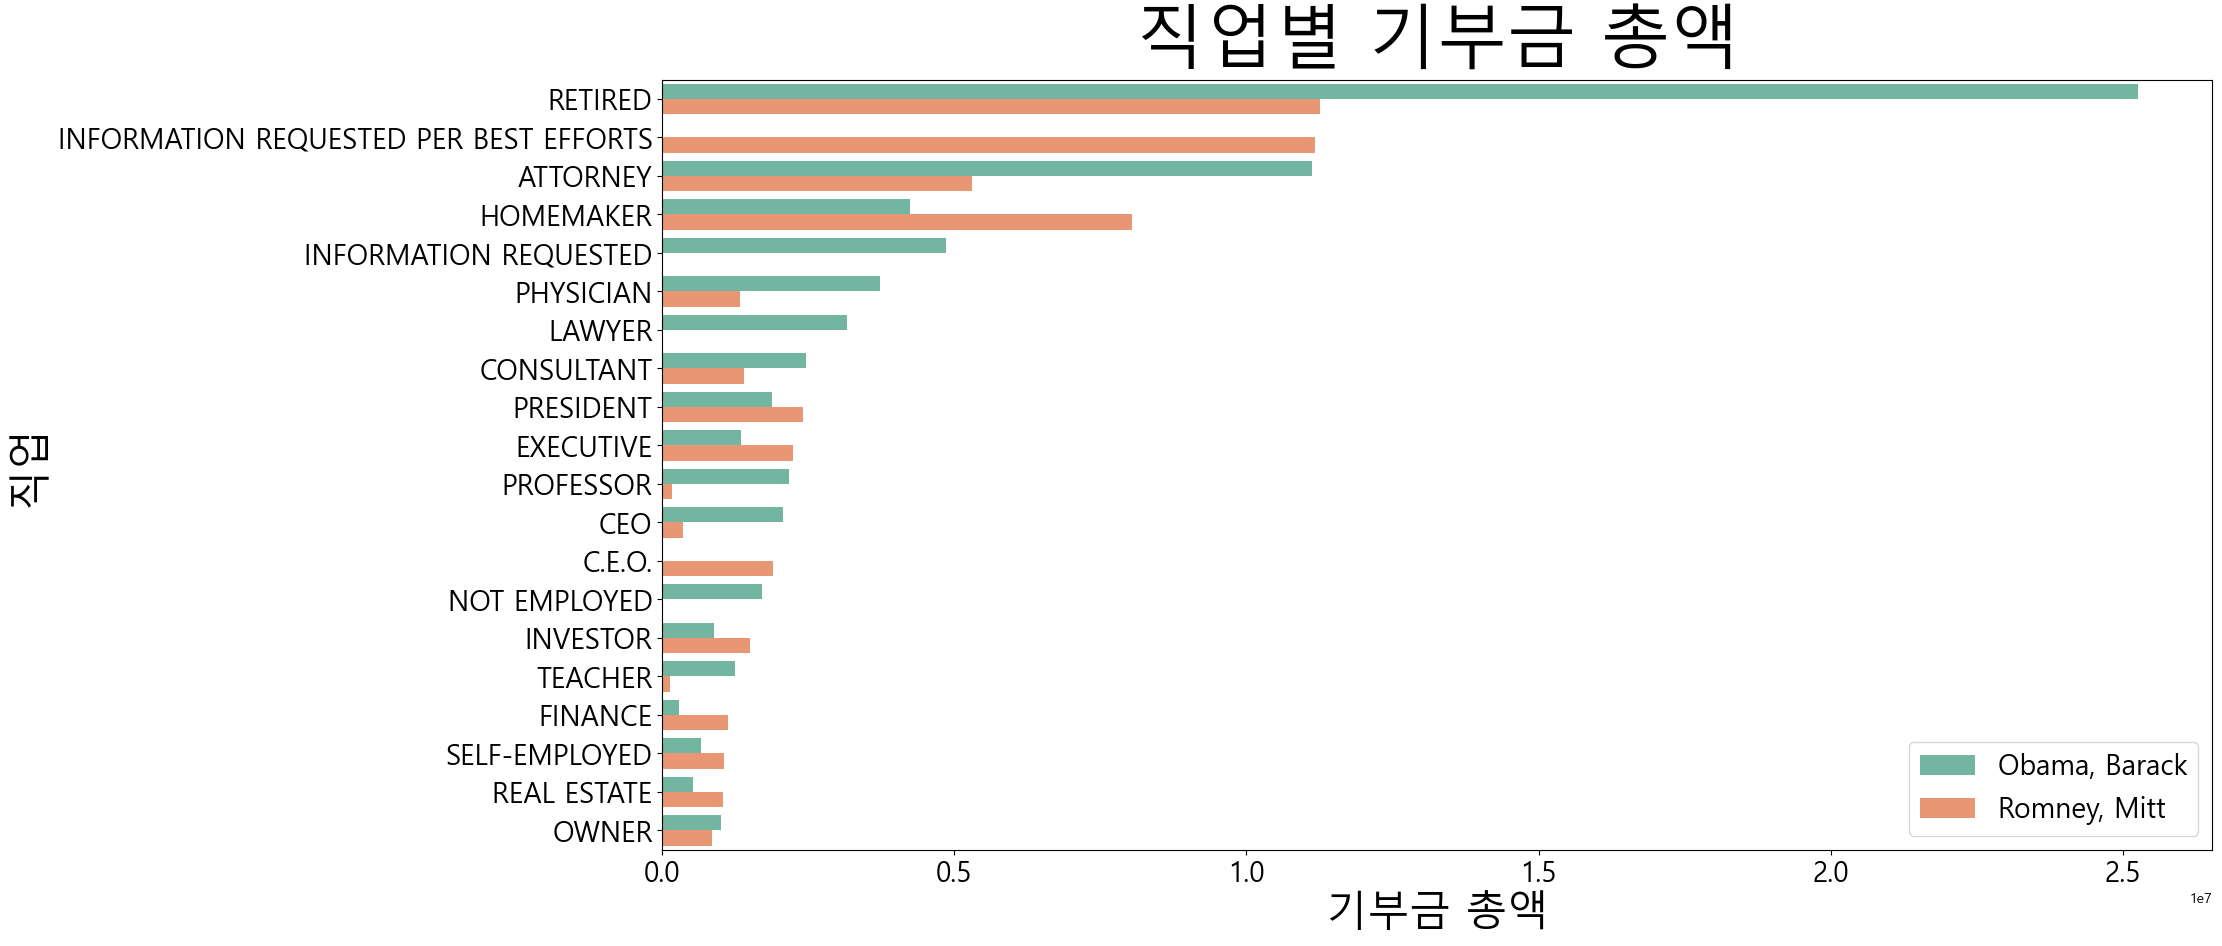

In [62]:
plt.figure(figsize = (20,10))

sns.set_palette('Set2')
sns.barplot(x = 'contb_receipt_amt', y = 'contbr_occupation', hue = 'cand_nm', data = df_g)

plt.title('직업별 기부금 총액', fontsize = 50)
plt.xticks(fontsize = 20)
plt.xlabel('기부금 총액',fontsize = 30)
plt.yticks(fontsize = 20)
plt.ylabel('직업',fontsize = 30)

plt.legend(fontsize = 20)
plt.show()

## Answer

In [63]:
df_pivot = df.pivot_table('contb_receipt_amt', index = 'contbr_occupation', columns = 'cand_nm', aggfunc = 'sum')
df_pivot.head(3)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN


In [64]:
top20 = df_pivot.sum(axis = 1).sort_values(ascending = False)[:20].index
top20

Index(['RETIRED', 'ATTORNEY', 'HOMEMAKER',
       'INFORMATION REQUESTED PER BEST EFFORTS', 'PHYSICIAN',
       'INFORMATION REQUESTED', 'PRESIDENT', 'CONSULTANT', 'EXECUTIVE',
       'LAWYER', 'CEO', 'INVESTOR', 'PROFESSOR', 'C.E.O.', 'OWNER',
       'SELF-EMPLOYED', 'NOT EMPLOYED', 'REAL ESTATE', 'FINANCE', 'TEACHER'],
      dtype='object', name='contbr_occupation')

<Axes: ylabel='contbr_occupation'>

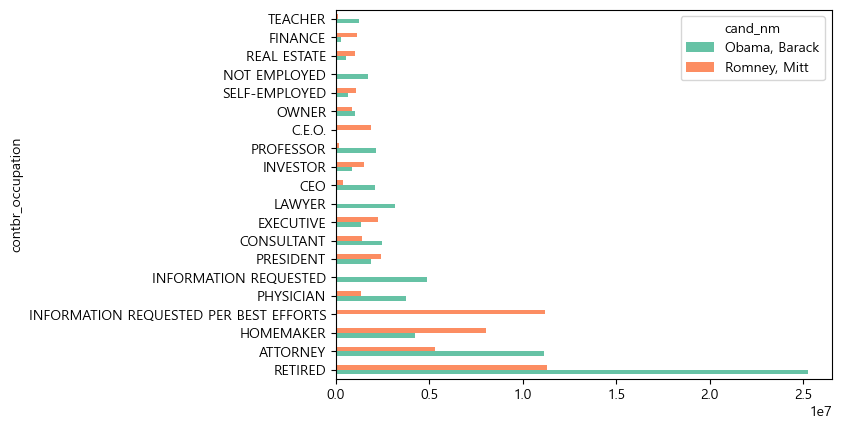

In [65]:
df_pivot.loc[top20].plot(kind = 'barh')